# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Damon

Last Name: Gaylor

Student ID: ###

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

In [1]:
# import statements that are used throughout the assignment

import numpy as np
import pandas as pd

import plotnine as p9
from plotnine import *

import warnings
warnings.filterwarnings("ignore")

from dateutil import parser
from datetime import datetime

from sklearn.linear_model import LinearRegression

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [2]:
# reading database, filling in missing values, dropping imputed columns
db_raw = pd.read_csv('tastdb-2010.csv', encoding = 'iso-8859-1', skipinitialspace = True)
db = db_raw.drop([col for col in db_raw.columns if 'imp' in col], axis = 1)

# database column names
print(db.columns.values)

['voyageid' 'evgreen' 'shipname' 'national' 'placcons' 'yrcons' 'placreg'
 'yrreg' 'rig' 'tonnage' 'tonmod' 'guns' 'ownera' 'ownerb' 'ownerc'
 'ownerd' 'ownere' 'ownerf' 'ownerg' 'ownerh' 'owneri' 'ownerj' 'ownerk'
 'ownerl' 'ownerm' 'ownern' 'ownero' 'ownerp' 'fate' 'fate2' 'fate3'
 'fate4' 'resistance' 'plac1tra' 'plac2tra' 'plac3tra' 'npafttra'
 'sla1port' 'adpsale1' 'adpsale2' 'portret' 'yearam' 'Date_dep' 'Date_buy'
 'Date_leftAfr' 'Date_land1' 'Date_depam' 'Date_end' 'captaina' 'captainb'
 'captainc' 'crew1' 'crew3' 'crewdied' 'slintend' 'ncar13' 'ncar15'
 'ncar17' 'tslavesd' 'slaarriv' 'slas32' 'slas36' 'slas39' 'menrat7'
 'womrat7' 'boyrat7' 'girlrat7' 'malrat7' 'chilrat7' 'jamcaspr' 'vymrtrat'
 'sourcea' 'sourceb' 'sourcec' 'sourced' 'sourcee' 'sourcef' 'sourceg'
 'sourceh' 'sourcei' 'sourcej' 'sourcek' 'sourcel' 'sourcem' 'sourcen'
 'sourceo' 'sourcep' 'sourceq' 'sourcer']


### Column Definitions ###

* **'voyageid':** voyage identification
* **'evgreen':** voyage in 1999 CD-ROM
* **'shipname':** name of vessel
* **'national':** country in which ship is registered
* **'placcons':** place where vessel constructed
* **'yrcons':** year of vessel's construction
* **'placreg':** place where vessel registered
* **'yrreg':** year of vessel's registration
* **'rig':** rig of vessel
* **'tonnage':** tonnage of vessel
* **'tonmod':** tonnage standardized on British measured tons
* **'guns':** guns mounted
* **'owner(a-p)':** owner of slaveship (1st-16th)
* **'fate':** particular outcome of voyage
* **'fate2':** outcome of voyage for slaves (imputed) - *instructions only specified deleting variables ending in 'imp', so this variable was not removed*
* **'fate3':** outcome of voyage if vessel captured (imputed) - *instructions only specified deleting variables ending in 'imp', so this variable was not removed*
* **'fate4':** outcome of voyage for owner (imputed) - *instructions only specified deleting variables ending in 'imp', so this variable was not removed*
* **'resistance':** African resistance
* **'plac(1-3)tra':** place of slave purchase (1st-3rd)
* **'npafttra':** port of call before Atlantic crossing
* **'sla1port':** first place of slave landing
* **'adpsale(1-2)':** place of slave landing (2nd-3rd)
* **'portret':** place at which voyage ended
* **'yearam':** year of arrival at port of disembarkation (imputed) - *instructions only specified deleting variables ending in 'imp', so this variable was not removed*
* **'Date_dep':** date that voyage began - *month and day will be disregarded*
* **'Date_buy':** date that slave purchase began - *month and day will be disregarded*
* **'Date_leftAfr':** date that vessel left the last slaving port - *month and day will be disregarded*
* **'Date_land1':** date that slaves landed at the first place - *month and day will be disregarded*
* **'Date_depam':** date ship left on return voyage - *month and day will be disregarded*
* **'Date_end':** date when voyage completed - *month and day will be disregarded*
* **'captain(a-c)':** captains' names (1st-3rd)
* **'crew1':** crew at voyage outset
* **'crew3':** crew at first landing of slaves
* **'crewdied':** crew died during complete voyage
* **'slintend':** slaves intended from first port of purchase
* **'ncar(13,15,17)':** slaves carried from port of purchase (1st-3rd)
* **'tslavesd':** total slaves on board at departure from last slaving
* **'slaarriv':** total slaves arrived at first port of disembarkation
* **'slas(32,36,39)':** slaves disembarked at place (1st-3rd)
* **'(__)rat7':** percentage of men/women/boys/girls/male/children at departure or arrival
* **'jamcaspr':** average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica
* **'vymrtrat':** slave mortality rate (slave deaths / slaves embarked)
* **'source(a-r)':** source of information (1st-18th)

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

In [3]:
print(str(db['tslavesd'].isna().sum()) + " values are missing (" + 
      str(round(db['tslavesd'].isna().sum()/len(db['tslavesd'])*100,1)) + "%).")

26734 values are missing (76.5%).


In [4]:
print("Intial estimate of total number of captives taken from Africa: " + 
      str(int((db['tslavesd'].mean()*len(db['tslavesd'])))))

Intial estimate of total number of captives taken from Africa: 11569160


1. `tslavesd`, the total number of slaves on board at departure from the last slaving, is the best estimate for the total number of captives taken from Africa. 

    In `tslavesd`, 26734 of the values are missing (76.5%).


2. The initial estimate for the total number of captives taken from Africa is 11,569,160, assuming `tslavesd` is missing values completely at random.


3. Some other variables that will be associated with `tslavesd` are: `ncar13`, `ncar15`, and `ncar17`. When added together, a value similar to `tslavesd` should be reached (although a little lower because of any slaves that died or slaves that were taken off for whatever reason). `slaarriv` and `vymrtrat` are also associated when used together. By using `db['slaarriv'] / (1 - db['vymrtrat']))`, the initial amount of slaves (before any died) could be calculated.

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [5]:
### values of 'national' with more than 100 voyages

major_nations = db['national'].value_counts().iloc[0:8]
major_nations


### filter out non-major nations in new DataFrame

major_db = db[(db['national'].isin(major_nations.index))]
major_db


### create flag variable

major_db['flag'] = np.nan

major_db.loc[major_db.national == 7.0, 'flag'] = "Great Britain"
major_db.loc[major_db.national == 4.0, 'flag'] = "Portugal"
major_db.loc[major_db.national == 10.0, 'flag'] = "France"
major_db.loc[major_db.national == 9.0, 'flag'] = "U.S.A."
major_db.loc[major_db.national == 1.0, 'flag'] = "Spain"
major_db.loc[major_db.national == 8.0, 'flag'] = "Netherlands"
major_db.loc[major_db.national == 5.0, 'flag'] = "Brazil"
major_db.loc[major_db.national == 11.0, 'flag'] = "Denmark"


### plotting voyages by flag as a function of year

# converting 'Date_dep' string to year
major_db = major_db.dropna(subset=['Date_dep'])

major_db['Date_dep'] = pd.to_datetime(major_db['Date_dep'], errors = 'coerce')

major_db['dep_year'] = np.nan
major_db['dep_year'] = major_db['Date_dep'].dt.year

# getting counts of number of voyages each year by flag
major_counts = major_db.groupby(["flag", "dep_year"]).size()

counts_df = pd.DataFrame(data = major_counts.index.get_level_values(level = 0))
counts_df['year'] = major_counts.index.get_level_values(level = 1)
counts_df['count'] = major_counts.values

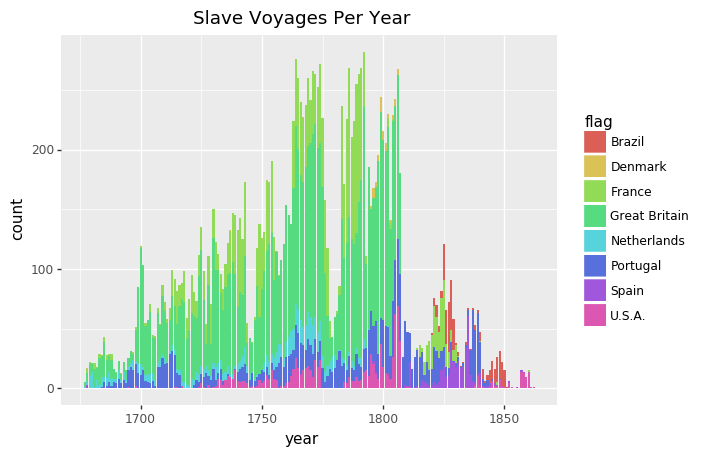

<ggplot: (-9223372036570825051)>

In [6]:
# plotting count by year and flag (single graph)
(ggplot(counts_df, aes(x = 'year', y = 'count', fill = 'flag'))
 + geom_col() + \
 ggtitle("Slave Voyages Per Year")
)

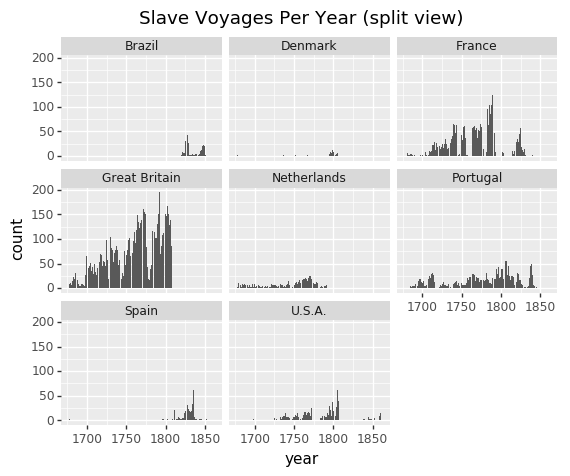

<ggplot: (-9223372036569033433)>

In [7]:
# plotting count by year and flag (multiple graphs)
(ggplot(counts_df, aes(x = 'year', y = 'count'))
 + facet_wrap('~flag')
 + geom_col() + \
 ggtitle("Slave Voyages Per Year (split view)")
)

In the plots above, the `geom_col()`, a bar chart, was used. For aesthetic mappings, `x` = departure year and `y` = number of voyages during that year. In the first graph, the different colors, the `fill`, was mapped to flag. In the second graph, `facet_wrap` was used to produce multiple graphs based on flag. In addition to the bar charts, titles were added to both graphs, "Slave Voyages Per Year" and "Slave Voyages Per Year (split view)".

It was not uncommon to find countries take a break from slave voyages. In 1740, the War of the Austrian Succession took place and involved several of the major slave importers, bringing overall voyages down significantly for those few years. Great Britain, the largest importer of slaves, took a break around 1775-1783 during the Revolutionary War with the United States. Not surprisingly, the United States also stopped voyages during that time. Lastly, the Haitian Revolution took place starting in 1791 and during that time, French voyages decreased significantly.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [8]:
# identifying the Brookes ship in the Wikipedia article
brook_df = major_db[major_db["shipname"].str.contains("Brook") == True]
brook_df["tslavesd"] # 29537 (609)
brook_df["menrat7"] # 29537 (.577966 = 351/609)
brook_df.iloc[5:9] # potential Brookes ship data points

voyageid  evgreen            shipname  national  placcons  yrcons  \
29534     80663      1.0              Brooks       7.0   10432.0  1781.0   
29535     80664      1.0              Brooks       7.0   10432.0  1781.0   
29536     80665      1.0              Brooks       7.0   10432.0  1781.0   
29537     80666      1.0  Brooks (a) Brookes       7.0   10432.0  1781.0   

       placreg   yrreg  rig  tonnage   ...                sourcek  \
29534  10432.0  1781.0  4.0    297.0   ...     LList, 19 Nov 1782   
29535  10432.0  1783.0  4.0    297.0   ...      Lambert,73,109-21   
29536  10432.0  1783.0  4.0    297.0   ...     LList, 31 Jan 1786   
29537  10432.0  1786.0  4.0    297.0   ...        cc, 13 Oct 1787   

                   sourcel             sourcem             sourcen   sourceo  \
29534   LList, 25 Feb 1783     Williams,585-86                 NaN       NaN   
29535  LList, 20 July 1784   LList, 6 Aug 1784  LList, 31 Aug 1784       NaN   
29536   LList, 14 Apr 1786        Williams,585                 NaN       NaN   
29537             craig,19  LList, 11 Dec 1787  LList, 12 Feb 1788  T70/1476   

            sourcep                         sourceq sourcer           flag  \
29534           NaN                             NaN     NaN  Great Britain   
29535           NaN                             NaN     NaN  Great Britain   
29536           NaN                             NaN     NaN  Great Britain   
29537  Williams,585  Huntington,ST,vol.26,87.11.10.     NaN  Great Britain   

      dep_year  
29534   1781.0  
29535   1783.0  
29536   1785.0  
29537   1786.0  

[4 rows x 91 columns]

First, I created a DataFrame from `major_db` (since the article stated that the Brookes was a British ship) that contained `"Brook"` in the `shipname`. From there, I read that one voyage (`29537`) had 609 slaves aboard (which matched one of the voyages). Digging deeper and using another [source](http://www.understandingslavery.com/index.php-option=com_content&view=article&id=445_model-of-the-brookes&catid=145&Itemid=255.html), I also found out that there were 351 men onboard the voyage with 609 people. By looking at `menrat7`, I concluded that that voyage was definitely the Brookes ship being referred to on the Wikipedia article. With that in mind, I eliminated all the remaining data points other than `29534`-`29537`, because they have the same tonnage as `29537`. These data points also have the same `yrcons` and `placcons`. I ignored the fact that they had different `yrreg` in the event that the ship had to be re-registered regularly or if the data was inaccurate. I believe these **4** data points are the Brookes ship in the article.

In [9]:
### creating db_reb, a subset of db that includes year of departure and a new variable, 'rebellion'

# initializing rebel_db
db_reb = db.dropna(subset=['Date_dep'])

# creating 'rebellion' variable
db_reb['rebellion'] = False 
db_reb.loc[(db_reb.resistance == 1) | (db_reb.resistance == 6), 'rebellion'] = True

# converting 'Date_dep' to year
db_reb['Date_dep'] = pd.to_datetime(db_reb['Date_dep'], errors = 'coerce')
db_reb['dep_year'] = np.nan
db_reb['dep_year'] = db_reb['Date_dep'].dt.year

# obtain years where there was rebellion
rebel_years = db_reb[db_reb['rebellion'] == True]['dep_year'].value_counts()

# creates all_counts_df which returns each year with the number of voyages and whether or not there was a rebellion
all_counts = db_reb['dep_year'].value_counts()
all_counts_df = pd.DataFrame(all_counts.index)
all_counts_df['count'] = all_counts.values
all_counts_df['rebellion'] = False
all_counts_df.columns = ['year', 'count', 'rebellion']

all_counts_df.loc[all_counts_df['year'].isin(rebel_years.index), 'rebellion'] = True
all_counts_df[all_counts_df['rebellion'] == True]
all_counts_df.head()

year  count  rebellion
0  1806.0    309       True
1  1774.0    291       True
2  1792.0    286       True
3  1772.0    284       True
4  1764.0    284       True

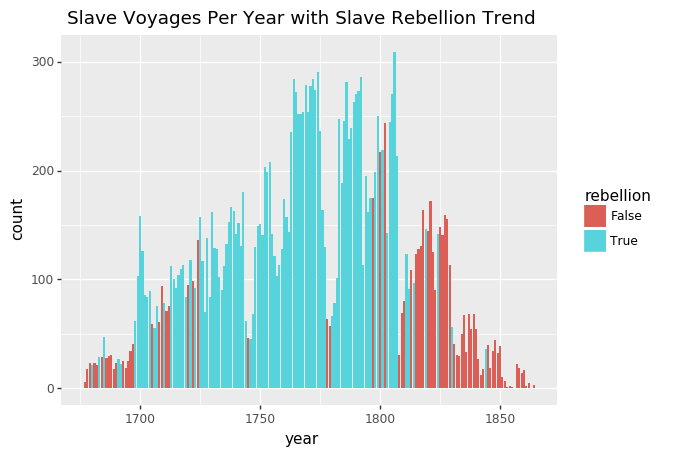

<ggplot: (-9223372036570724327)>

In [10]:
# plotting count by year and whether there was rebellion
(ggplot(all_counts_df, aes(x = 'year', y = 'count', fill = 'rebellion'))
 + geom_col() + \
 ggtitle("Slave Voyages Per Year with Slave Rebellion Trend")
)

Through the graph above, it is clear that at the beginning and end of the recorded slave trade, there were fewer voyages, and therefore, a lower chance of rebellion per year. When the slave trade heated up and there were more voyages per year, there was a much higher chance of a rebellion that year. Because of this, the middle years generally had rebellions, while the tails did not.

In [11]:
# attempt to find Amistad by name
amistad_df = db[db['shipname'].str.contains('Amistad') == True]
amistad_df['resistance'] # no recorded resistance

# attempt to find Amistad by captain name, Ferrer, in the 10 year time frame

# adding dep_year to db
db['Date_dep'] = pd.to_datetime(db['Date_dep'], errors = 'coerce')
db['dep_year'] = np.nan
db['dep_year'] = db['Date_dep'].dt.year

# searching for Captain Ferrer between 1834 and 1844
ferrer_df = db[db['captaina'].str.contains('Ferrer') == True]
ferrer_df[(ferrer_df['dep_year'] >= 1834) & (ferrer_df['dep_year'] <= 1844)]['resistance'] # no resistance

# searching for any resistance between 1834 and 1844
ten_year = db[(db['dep_year'] >= 1834) & (db['dep_year'] <= 1844)]
ten_year[ten_year['resistance'] == 1] # one resistance in 1844 by the shipname Kentucky
ten_year['fate'].value_counts().head()

1.0      236
120.0    200
208.0      9
122.0      8
124.0      5
Name: fate, dtype: int64

While I could not find the Amistad ship that ran into resistance, I did find one ship that ran into resistance, "Kentucky" in 1844. While that is not all too interesting, I looked into the fates of other ships in the ten year period surrounding La Amistad and found that 200 ships suffered `fate = 120`, "Court of Mixed Commission, Sierra Leone, condemned". Through my research, I found out that during this time period, these courts were put in place to help stop the slave trade. If "La Amistad" was classified under a different name, it could have easily been one of the 200 ships that were condemned through the court.

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [12]:
### coding arrival and departure locations by area

# dropping NaN values from 'sla1port' and 'portret'
coded_db = db.dropna(subset=['sla1port', 'portret'])

# coding by location
coded_db.loc[(coded_db.sla1port >= 10000) & (coded_db.sla1port <= 19999) , 'sla1port_code'] = 'Europe'
coded_db.loc[(coded_db.portret >= 10000) & (coded_db.portret <= 19999) , 'portret_code'] = 'Europe'

coded_db.loc[(coded_db.sla1port >= 20000) & (coded_db.sla1port <= 29999) , 'sla1port_code'] = 'Main N.A.'
coded_db.loc[(coded_db.portret >= 20000) & (coded_db.portret <= 29999) , 'portret_code'] = 'Main N.A.'

coded_db.loc[(coded_db.sla1port >= 30000) & (coded_db.sla1port <= 39999) , 'sla1port_code'] = 'Caribbean'
coded_db.loc[(coded_db.portret >= 30000) & (coded_db.portret <= 39999) , 'portret_code'] = 'Caribbean'

coded_db.loc[(coded_db.sla1port >= 40000) & (coded_db.sla1port <= 49999) , 'sla1port_code'] = 'Span. M.A.'
coded_db.loc[(coded_db.portret >= 40000) & (coded_db.portret <= 49999) , 'portret_code'] = 'Span. M.A.'

coded_db.loc[(coded_db.sla1port >= 50000) & (coded_db.sla1port <= 59999) , 'sla1port_code'] = 'Brazil'
coded_db.loc[(coded_db.portret >= 50000) & (coded_db.portret <= 59999) , 'portret_code'] = 'Brazil'

coded_db.loc[(coded_db.sla1port >= 60000) & (coded_db.sla1port <= 69999) , 'sla1port_code'] = 'Africa'
coded_db.loc[(coded_db.portret >= 60000) & (coded_db.portret <= 69999) , 'portret_code'] = 'Africa'

coded_db.loc[(coded_db.sla1port >= 80000) & (coded_db.sla1port <= 89999) , 'sla1port_code'] = 'Other'
coded_db.loc[(coded_db.portret >= 80000) & (coded_db.portret <= 89999) , 'portret_code'] = 'Other'

# coded DataFrame
coded_db.head()

voyageid  evgreen           shipname  national  placcons  yrcons  \
116       117      1.0             Rôdeur      10.0       NaN     NaN   
120       121      1.0             Aurore      10.0       NaN     NaN   
289       292      1.0  General D Antônio       4.0   21999.0     NaN   
339       342      1.0               Rose      10.0   10720.0  1821.0   
341       344      1.0  Aimable Henriette      10.0   10720.0  1822.0   

     placreg  yrreg  rig  tonnage     ...       sourcel  sourcem sourcen  \
116      NaN    NaN  NaN    200.0     ...           NaN      NaN     NaN   
120      NaN    NaN  2.0     98.0     ...           NaN      NaN     NaN   
289      NaN    NaN  1.0      NaN     ...           NaN      NaN     NaN   
339      NaN    NaN  1.0    138.0     ...           NaN      NaN     NaN   
341      NaN    NaN  1.0    138.0     ...           NaN      NaN     NaN   

    sourceo sourcep sourceq sourcer dep_year sla1port_code portret_code  
116     NaN     NaN     NaN     NaN   1819.0     Caribbean       Europe  
120     NaN     NaN     NaN     NaN   1820.0     Caribbean       Europe  
289     NaN     NaN     NaN     NaN   1821.0        Brazil       Europe  
339     NaN     NaN     NaN     NaN   1822.0     Caribbean       Europe  
341     NaN     NaN     NaN     NaN   1822.0     Caribbean       Europe  

[5 rows x 92 columns]

I selected `sla1port` (first place of slave landing) and `portret` (place at which voyage ended) because those variables represent a journey from where the crew initially landed and where they eventually rested the ship. Other variables that made more sense had too many NaN. `sla1port` had 10,092, while `portret` had 24,298. Some other variables had well over 30,000 missing values.

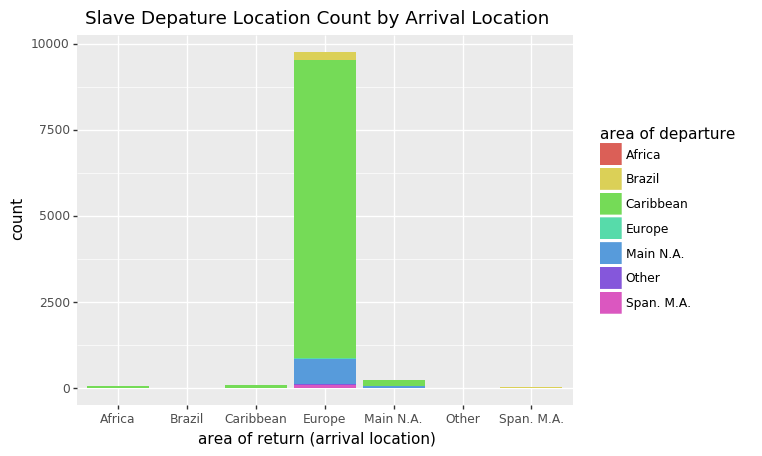

<ggplot: (283120574)>

In [13]:
### plotting slave depature location count by arrival location

# getting counts of number of area departures each year by arrival location

loc_trend = coded_db.groupby(["portret_code", "sla1port_code"]).size()

loc_df = pd.DataFrame(data = loc_trend.index.get_level_values(level = 0))
loc_df['sla1port_code'] = loc_trend.index.get_level_values(level = 1)
loc_df['count'] = loc_trend.values
loc_df


# plotting count of slave depature locations by arrival locations

(ggplot(loc_df, aes(x = 'portret_code', y = 'count', fill = 'sla1port_code'))
 + geom_col() + \
 ggtitle("Slave Depature Location Count by Arrival Location") +
 xlab("area of return (arrival location)") +
 labs(fill = "area of departure")
)

The graph above makes it explicitly clear that the vast majority of voyages' first slave landing place was the Caribbean and then finished up the voyage in Europe. This was followed by a landing place in Mainland North America with the voyage ending in Europe.

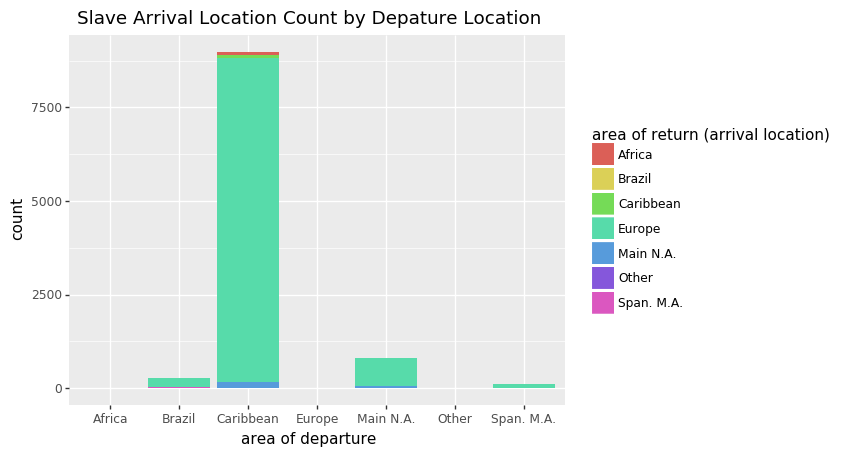

<ggplot: (283108367)>

In [14]:
# plotting count of slave arrival locations by depature locations

(ggplot(loc_df, aes(x = 'sla1port_code', y = 'count', fill = 'portret_code'))
 + geom_col() + \
 ggtitle("Slave Arrival Location Count by Depature Location") +
 xlab("area of departure") +
 labs(fill = "area of return (arrival location)")
)

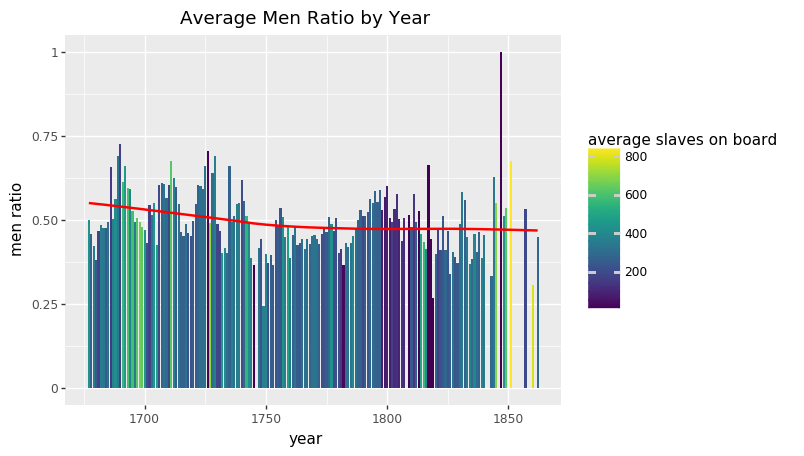

<ggplot: (-9223372036570728532)>

In [15]:
### representing average men ratio by year

# creating a DataFrame that will store years and average men ratio and slaves on board per year
year_ratio = db[['dep_year', 'menrat7', 'tslavesd']]
year_ratio = year_ratio.dropna(subset=['dep_year', 'menrat7'])
year_ratio_grouped = year_ratio.groupby('dep_year', as_index=False)['menrat7'].mean()
year_ratio_grouped['tslavesd'] = year_ratio.groupby('dep_year', as_index=False)['tslavesd'].mean()['tslavesd']
year_ratio_grouped

# plotting average men ratio per year with average slaves on board taking on different colors
(ggplot(year_ratio_grouped, aes(x = 'dep_year', y = 'menrat7', fill = 'tslavesd'))
 + geom_col()
 + stat_smooth(color = 'red') + \
 ggtitle("Average Men Ratio by Year") +
 xlab("year") +
 ylab("men ratio") +
 labs(fill = "average slaves on board")
)

In the graph above, I used `geom_col()` to display the ratio each year (with a fill of average slaves on board per year), along with `stat_smooth` to show the overall trend. I experimented with `geom_point()` and although it created a more attractive graph, it was hard to distinguish between different number of slaves on board. Other aesthetic mappings included `x = 'dep_year'`, `y = 'menrat7'`, and for `stat_smooth`, `color = 'red'`. I also added a title and relabelled the x & y axes and legend.

Through the plot, it can be observed that the average men ratio per year decreased from a high of around 0.6 to a low of under 0.5. I expected average slaves on board to act as a confounding variable, where having more people on board may increase the men ratio, but this does not seem to be the case.

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

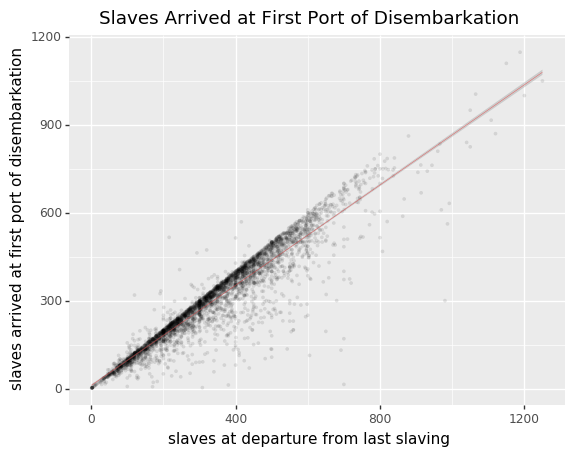

<ggplot: (-9223372036571664724)>

In [16]:
# plotting number of slaves at departure from last slaving and the number that arrived at first port
survival_db = db[['tslavesd', 'slaarriv', 'dep_year']].dropna()

(ggplot(survival_db, aes(x = 'tslavesd', y = 'slaarriv'))
 + geom_point(alpha = 0.1, stroke = 0)
 + stat_smooth(method = 'lm', color = 'red', size = 0.1) + \
 ggtitle("Slaves Arrived at First Port of Disembarkation") +
 xlab("slaves at departure from last slaving") +
 ylab("slaves arrived at first port of disembarkation")
)

In [17]:
# obtaining linear regression line
X = survival_db['tslavesd'].values[:,np.newaxis]
y = survival_db['slaarriv'].values

model = LinearRegression().fit(X, y)
print("y = " + str(model.coef_[0]) + "x + " + str(model.intercept_))

y = 0.8554606687528965x + 10.353458690680668


The variables above concentrate near the line `y = x`, because the majority of slaves survived the voyage. Those points that fall under that line represent a higher mortality rate. The further down from `y = x`, the higher the mortality rate. Whenever a point lands above `y = x`, it could mean that either the data collected at one of the points was inaccurate or because of births on the voyage.

To separate data, instead of using `y = x`, I used the linear regression line, `y ~ 0.8555x + 10.353`. This should assist with finding the average mortality rate. Whenever a point is above this line, the mortality rate was lower than average, while a point under the line represents a mortality rate higher than average.

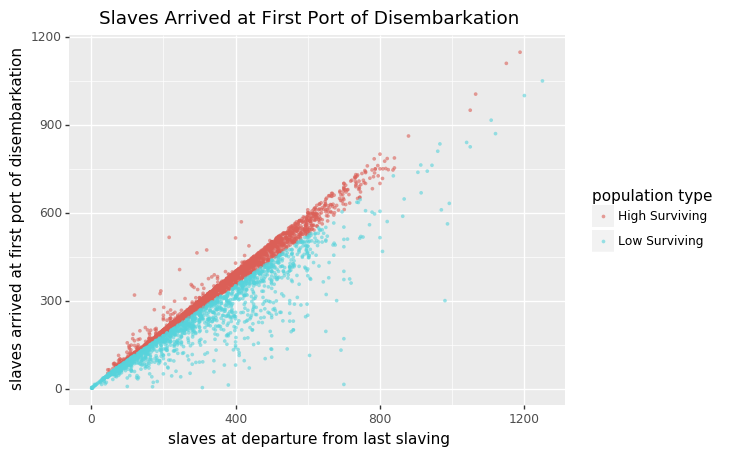

<ggplot: (-9223372036571674224)>

In [18]:
# separating data into two populations, high surviving (greater than average survival rate) and
# low surviving (lower than average survival rate)

survival_db['difference'] = survival_db['slaarriv'] - model.coef_[0]*survival_db['tslavesd'] - model.intercept_

survival_db.loc[(survival_db.difference > 0) , 'population'] = 'High Surviving'
survival_db.loc[(survival_db.difference < 0) , 'population'] = 'Low Surviving'


# plotting data (now color coded by high and low surviving populations)

(ggplot(survival_db, aes(x = 'tslavesd', y = 'slaarriv', fill = 'population'))
 + geom_point(alpha = 0.6, stroke = 0) + \
 ggtitle("Slaves Arrived at First Port of Disembarkation") +
 xlab("slaves at departure from last slaving") +
 ylab("slaves arrived at first port of disembarkation") +
 labs(fill = "population type")
)

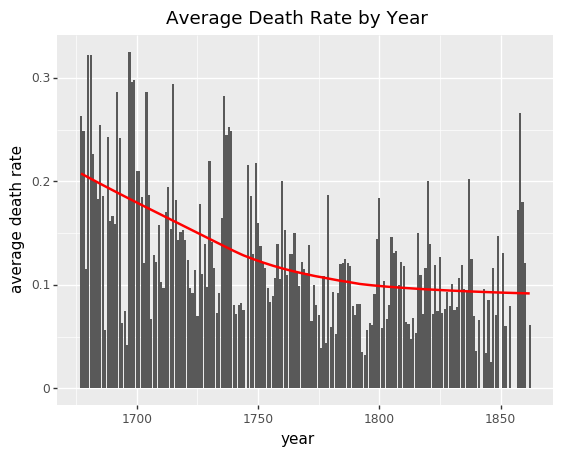

<ggplot: (284054073)>

In [19]:
# calculating death rate (and assuming 0% death rate when death rate is calculated to be less than 0%)
survival_db['death_rate'] = (db['tslavesd'] - db['slaarriv']) / db['tslavesd']
survival_db.loc[(survival_db.death_rate < 0), 'death_rate'] = 0
survival_db

# obtaining average death rate per year
survival_db_grouped = survival_db.groupby('dep_year', as_index=False)['death_rate'].mean()
survival_db_grouped['tslavesd'] = survival_db.groupby('dep_year', as_index=False)['tslavesd'].mean()['tslavesd']
survival_db_grouped

# plotting death rate per year
(ggplot(survival_db_grouped, aes(x = 'dep_year', y = 'death_rate'))
 + geom_col()
 + stat_smooth(color = 'red') + \
 ggtitle("Average Death Rate by Year") +
 xlab("year") +
 ylab("average death rate")
)

At the beginning of the slave trade, before 1700, the average death rate per year was very high (over 20%). Because crews wanted to protect their cargo and obtain the maximum amount of money as possible on a voyage, they developed strategies to keep as many people alive as possible. Because of this, by the end of the trade near 1850, the average death rate was halved, at around 10%. One interesting observation is that there seem to be certain spikes throughout the years. Looking at previous graphs relating to the number of voyages per year, I believe this sharp increase in death rate occurs when there are very few voyages during a given year (some of which must have ultimately seen high death rates). Towards the end of the slave trade, in addition to a few voyages causing a high death rate, I believe that since the trade was becoming illegal, crew members had to do a better job of hiding slaves and may have ended up losing more people as a result of deplorable conditions onboard.

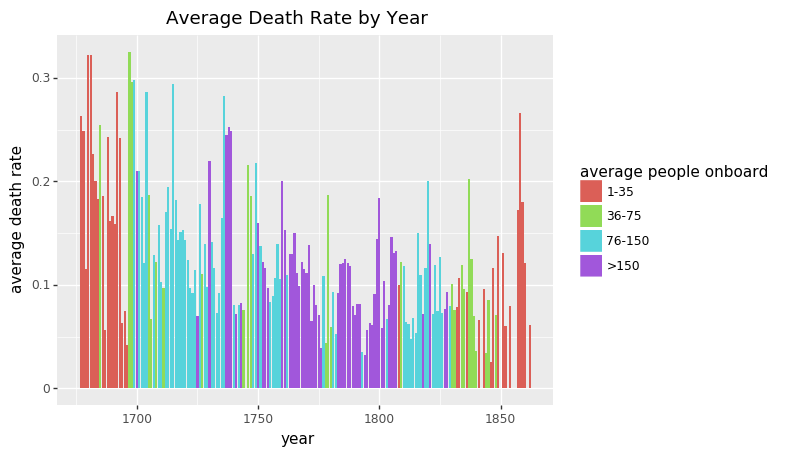

<ggplot: (283111530)>

In [20]:
# pulling voyages per year from unrestricted DataFrame and dividing into 4 groups
all_years = db['dep_year'].value_counts()
years_avail = np.array(survival_db_grouped['dep_year'])
grouped_counts = all_years.sort_index()[years_avail]
survival_db_grouped['counts'] = np.array(grouped_counts)

survival_db_grouped.loc[(survival_db_grouped.counts >= 1) & (survival_db_grouped.counts <= 35) , 
                        'counts_group'] = '1-35'
survival_db_grouped.loc[(survival_db_grouped.counts >= 36) & (survival_db_grouped.counts <= 75) , 
                        'counts_group'] = '36-75'
survival_db_grouped.loc[(survival_db_grouped.counts >= 76) & (survival_db_grouped.counts <= 150) , 
                        'counts_group'] = '76-150'
survival_db_grouped.loc[(survival_db_grouped.counts >= 151), 'counts_group'] = '>150'

# plotting death rate per year with counts_group fill
(ggplot(survival_db_grouped, aes(x = 'dep_year', y = 'death_rate', fill = 'counts_group'))
 + geom_col() +\
 ggtitle("Average Death Rate by Year") +
 xlab("year") +
 ylab("average death rate") +
 labs(fill = "average people onboard")
)

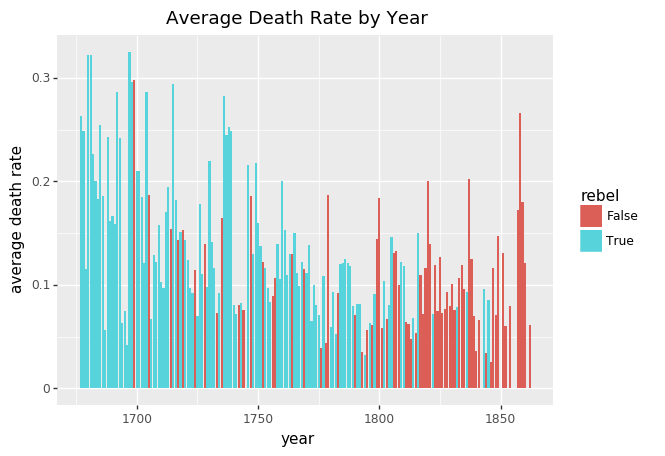

<ggplot: (283116061)>

In [21]:
# adding variable for if there was a rebellion that year
survival_db_grouped['rebel'] = False
survival_db_grouped.loc[(all_counts_df.rebellion == True), 'rebel'] = True
survival_db_grouped

# plotting death rate with rebel fill
(ggplot(survival_db_grouped, aes(x = 'dep_year', y = 'death_rate', fill = 'rebel'))
 + geom_col() +\
 ggtitle("Average Death Rate by Year") +
 xlab("year") +
 ylab("average death rate")
)

For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

For the plots above, I continued to use `geom_col()`. I used the aesthetics `x = dep_year` and `y = death_rate` for both graphs, but changed the `fill` to `counts_groups` (bins for the average number of people on board for a year) for the first graph and `rebel` (whether or not there was a rebellion that year) for the second. Each graph was also given `ggtitle('Average Death Rate by Year')`

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

In [22]:
# using correlation matrix to see which of the predictors I chose were most likely correlated
corr_matrix = survival_db_grouped.corr()
corr_matrix["death_rate"].sort_values(ascending=False)

# fitting linear model for 'dep_year' and 'rebel' (because 'dep_year' had a large negative correlation) to predict
# death_rate

X = survival_db_grouped[['dep_year', 'rebel']]
Y = survival_db_grouped['death_rate']

model = LinearRegression().fit(X, Y)
print("death_rate = " + str(model.coef_[0]) + "*dep_year + " + str(model.coef_[1]) + "*rebel + " + str(model.intercept_))

death_rate = -0.0006340123682261483*dep_year + -0.002936228934417035*rebel + 1.2514341797949555


Using the most likely predictors, `death_rate = 0.000634*dep_year - 0.002936*rebel + 1.251434`. I will use the `db_reb` DataFrame from before, which has over 21,000 completely enumerated data points.

In [23]:
# creating smaller DataFrame with only variables in formula
pred_vars = db_reb[['tslavesd', 'slaarriv', 'rebellion', 'dep_year']]

# computing pi and avg_increase
pred_vars['difference'] = pred_vars['slaarriv'] - pred_vars['tslavesd']
abnormal_diff = pred_vars[pred_vars['difference'] > 0]
pi = 1 - (len(abnormal_diff) / len(pred_vars))
avg_increase = abnormal_diff['difference'].mean()

# replacing NaN 'tslavesd' values with estimate from 'slaariv' / 'death_rate'
pred_vars.loc[(pred_vars.tslavesd.isna()) & (pred_vars.slaarriv > 0) , 
              'tslavesd'] = pred_vars['slaarriv']/(1-(model.coef_[0]*pred_vars['dep_year'] + 
                                                      model.coef_[1]*pred_vars['rebellion'] + model.intercept_))
# estimating slaves departed with depature year
model2_db = db_reb[['dep_year', 'tslavesd']].dropna()
X2 = model2_db[['dep_year']]
Y2 = model2_db['tslavesd']
model2 = LinearRegression().fit(X2, Y2)

# replacing NaN 'tslavesd' values with estimate from model above
pred_vars.loc[(pred_vars.tslavesd.isna()) ,
             'tslavesd'] = model2.coef_[0]*pred_vars['dep_year'] + model2.intercept_

### replacing NaN 'slaarriv' values with formula given

# creating death_rate variable to make calculation cleaner
pred_vars['death_rate'] = ((model.coef_[0]*pred_vars['dep_year'] + 
                                                      model.coef_[1]*pred_vars['rebellion'] + model.intercept_))

# using death_rate to fill in NaN 'slaarriv' values
pred_vars.loc[(pred_vars.slaarriv.isna()) ,
             'slaarriv'] = pi*(1 - pred_vars['death_rate'])*pred_vars['tslavesd'] + (1 - pi)*avg_increase

# completed pred_vars
pred_vars.head()

tslavesd  slaarriv  rebellion  dep_year  difference  death_rate
0  322.246469     290.0      False    1816.0         NaN    0.100068
1  247.796423     223.0      False    1816.0         NaN    0.100068
2  388.918152     350.0      False    1816.0         NaN    0.100068
3  380.028595     342.0      False    1816.0         NaN    0.100068
7  415.586826     374.0      False    1816.0         NaN    0.100068

Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate. How does this differ from your first estimate obtained by assuming MCAR?

In [26]:
# new estimate for predicted total number of captives taken
# taking average of pred_vars['tslaves'] multiplied by total number of voyages

total_captives = pred_vars['tslavesd'].mean()*len(db) 
int(total_captives) # 11,114,651

# estimate for total number of deaths
# taking average of the difference between pred_vars['tslavesd'] and pred_vars['slaariv'] multiplied by total number
# of voyages

total_arrived = pred_vars['slaarriv'].mean()*len(db)
int(total_arrived) # 9,687,113

total_deaths = total_captives - total_arrived
int(total_deaths) # 1,427,538

# estimate for overall death rate
# taking total_deaths / total_captives

overall_death_rate = total_deaths/total_captives
round(overall_death_rate, 4) # 13.09%

0.1309

In [25]:
# comparing death_rate of years missing 'tslavesd' with overall death rate

db[(db['dep_year'] > 0) & (db['tslavesd'].isna())]['dep_year'].mean() # 1769
survival_db_grouped[(survival_db_grouped['dep_year'] >= 1764) & 
                    (survival_db_grouped['dep_year'] <= 1774)]['death_rate'].mean() # 11.12%

0.1111691681823983

#### New Estimates ####
* **total captives:** 11,114,651
* **total deaths:** 1,427,538
* **overall death rate**: 13.09%

#### Old Estimate (using MCAR) ####
* **total captives:** 11,569,160

The new estimate is slightly lower than the old estimate. This makes sense, given the average `dep_year` where `tslavesd` was `NaN` in the original `db` DataFrame was about 1769. In the 5 years before and after 1769, the average `death_rate` was 11.12% per year (lower than the overall death rate). While this is not the best support for why the new estimate was lower, it is a strong possibility.